In [1]:
import pandas as pd

df = pd.read_csv("Data/cancer.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
#Rename cols

# Renaming columns
cols = {0: "ID", 1: "Clump Thickness", 2: "Uniformity of Cell Size", 3: "Uniformity of Cell Shape", 4: "Marginal Adhesion", 5:"Single Epithelial Cell Size",
              6: "Bare Nuclei", 7: "Bland Chromatin", 8: "Normal Nucleoli", 9: "Mitoses", 10: "Class"}


df = df.rename(cols,axis=1)
df.head()



,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Import numpy
import numpy as np
# Inspect missing values in the dataset
print(df.isnull().values.sum())


0


In [4]:
# Iterate over each column of cc_apps
for col in df:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df =df.fillna(df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
df.isnull().sum()
df = df.replace('?',np.nan)
df.fillna(0,inplace=True)

In [5]:
# Drop the ID column
df = df.drop(columns = df.columns[0], axis=1)
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


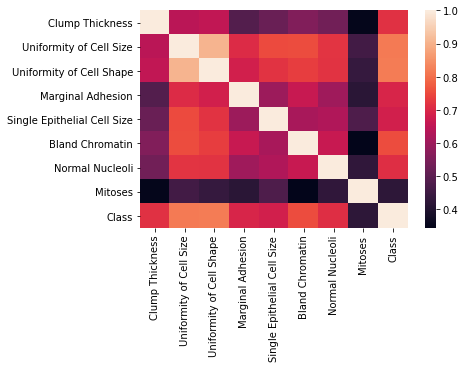

In [6]:
import seaborn as sns
sns.heatmap(df.corr())

In [7]:
df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# segregate features and lables into separate variables
X= df.drop(['Class'], axis=1)
y=df['Class']
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [10]:
# Import LogisticRegression

from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Import confusion_matrix

from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

predict_model = pd.DataFrame(logreg.predict(X_test))


 logreg accuracy classifier:  0.9666666666666667


In [35]:
labels = ['Positive', ' Negative']
pd.DataFrame(confusion_matrix(y_pred, y_test),columns=labels,index =labels)

,Positive,Negative
Positive,141,5
Negative,2,62



#### * 5 and 2 incorrect predictions
#### * 141 and 62 correct predictions

In [37]:
precision = 141/(141+2)
recall = 141/(141+5)
F1 = 2*((precision*recall)/(precision+recall))

In [38]:
# Get the accuracy score of logreg model and print it
print(" Accuracy: ", logreg.score(rescaledX_test, y_test))
print(" Precision: ", precision)
print(" Recall: ", recall)
print(" F1: ", F1)

# Print the confusion matrix of the logreg model

 Accuracy:  0.9666666666666667
 Precision:  0.986013986013986
 Recall:  0.9657534246575342
 F1:  0.9757785467128028


In [32]:
#classification report 
import warnings
warnings.filterwarnings('always')
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_model))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       143
           4       0.32      1.00      0.48        67

    accuracy                           0.32       210
   macro avg       0.16      0.50      0.24       210
weighted avg       0.10      0.32      0.15       210



/home/tshepo/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tshepo/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tshepo/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import statsmodels.api as sm
#Adding constant column 
X1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X1).fit()
model.pvalues

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [34]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64